# Melbourne Housing Market

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

# Melbourne Housing Project
Using this data create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer. The project should follow the guidelines as
#### [0. Handling missing values and exploring data(Data Cleaning)](#cau0)
#### [1. Examine and explore data (visualization, interactions among features)](#cau1)
#### [1,5. Create Linear Regession model](#cau1.5)
#### [2. Apply the model for prediction with holdout and cross validation](#cau2)
#### [3. Using PCA, apply the model with holdout and cross validation](#cau3)
#### [4. Visualize the residue and homoscedasticity](#cau4)
#### [5. Tune the model if necessary](#cau5)
#### [6. Write up analysis for each section (For example: explain why the model is overfitting, explain why applying PCA is better, etc.)](#cau6)
#### [Include conclusions for summary](#cau7)

<a id='cau0'></a>
# Handling missing values and exploring data(Data Cleaning)

#### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

---------------------------------------------------------------

## Exploring data

###### Columns in data 

In [3]:
data.head().columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

##### Summarize data's structure

In [4]:
data.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [6]:
data.shape

(34857, 21)

----------------------------------------------

## Handling missing values

<img src="http://www.elimhk.com/myblog/wp-content/uploads/2017/04/axis.png",width=500,height=350>


#### Detect which cells have missing values, and then count how many there are in each column 

In [7]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Depending on the information above, we can see that some columns having missing values are 'Price' , 'Bedroom2' , 'Bathroom' ,'Car', 'Landsize', 'BuildingArea' , 'YearBuilt' , 'Lattitude','Longtitude','Regionname' and 'Propertycount' 

In [8]:
data.Price.isnull().sum()

7610

In [9]:
7610/34857*100

21.83205668875692

In [10]:
data.Price.describe().T

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [11]:
data.Price.median()

870000.0

In [12]:
data.loc[data.Price.isnull(),'Price'] = 1050173

<strong> Column: </strong> Price

<strong>Issue Analyze</strong>:

<strong>Missing count:</strong> 7610 over 34857 (21.83%)

<strong>Column overview:</strong> 
 * The mean is 1.050.173, the median is 870.000, STD is 641.467, Min=85.000, Max=11.200.000. 
 * The values do not vary much from percentile = 25% to 75%

<strong>Solve</strong>: replace NaN by mean = 1.050.173

In [13]:
data.drop(data[data.Postcode.isnull()].index, inplace=True)

In [14]:
data.drop(data[data.CouncilArea.isnull()].index, inplace=True)
data.drop(data[data.Regionname.isnull()].index, inplace=True)
data.drop(data[data.Propertycount.isnull()].index, inplace=True)

<strong> Column: </strong> PostPone

<strong>Missing count:</strong> 1 ,2  over 34857 

<strong>Solve</strong>: Delete these rows

In [15]:
data.mode().T

,0
Suburb,Reservoir
Address,5 Charles St
Rooms,3
Type,h
Price,1.05017e+06
Method,S
SellerG,Jellis
Date,28/10/2017
Distance,11.2
Postcode,3073


In [16]:
data.Bedroom2.fillna(data.Bedroom2.mode()[0], inplace=True)
data.Bathroom.fillna(data.Bathroom.mode()[0], inplace=True)
data.Car.fillna(data.Car.mode()[0], inplace=True)
data.YearBuilt.fillna(data.YearBuilt.mode()[0], inplace=True)

<strong> Columns: </strong> Bedroom2, Bathroom, Car, YearBuilt

<strong>Solve</strong>: Take mode()

In [17]:
data.Bedroom2.mode()[0]

3.0

In [18]:
data.Lattitude.fillna(data.Lattitude.mean(), inplace=True)
data.Longtitude.fillna(data.Longtitude.mean(), inplace=True)
data.Landsize.fillna(data.Landsize.mean(), inplace=True)
data.BuildingArea.fillna(data.BuildingArea.mean(), inplace=True)


<strong> Columns: </strong> Lattitude, Longtitude, Lansize, BuildingArea

<strong>Solve</strong>: Take mean()

--------------------------------------------------

<a id='cau1'></a>
# 1. Examine and explore data (visualization, interactions among features

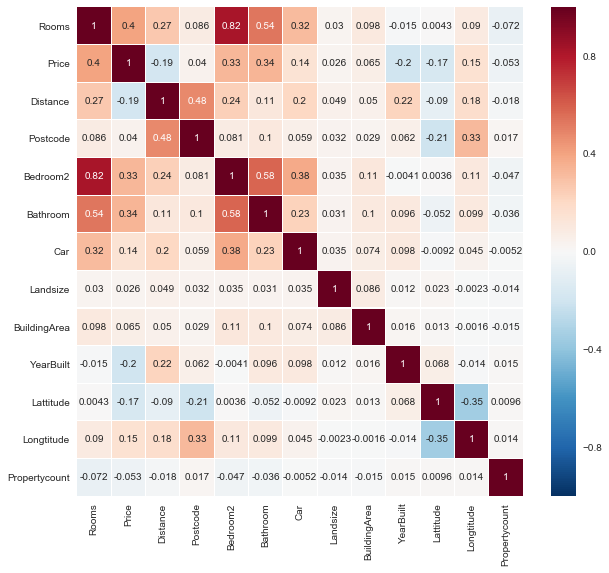

In [21]:
plt.figure(figsize=(10,9))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0,  annot= True, linewidths=0.1 )

In [22]:
data[['Rooms','Bedroom2']].corr()

,Rooms,Bedroom2
Rooms,1.000000,0.823836
Bedroom2,0.823836,1.000000


Depending on the diagram above. We can summarize top elements having strong correlation

## The correlation between Price and Rooms In detail

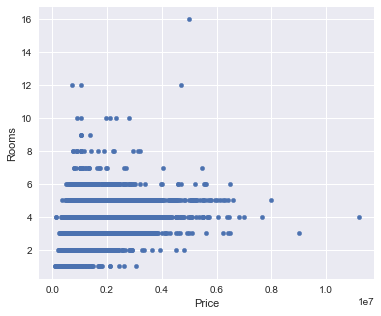

In [28]:
data.plot(y='Rooms',x='Price',kind='scatter',figsize=(6,5))

The correlation of the Price and Rooms are kinda high (0.5 - > 1.0)

## The correlation between Price and Distance In detail

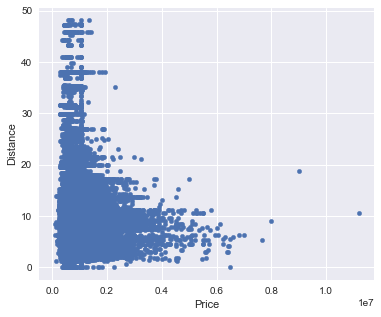

In [30]:
data.plot(y='Distance',x='Price',kind='scatter',figsize=(6,5))

The correlation between Distance and Price is super weak

## The correlation between Price and Cars In detail

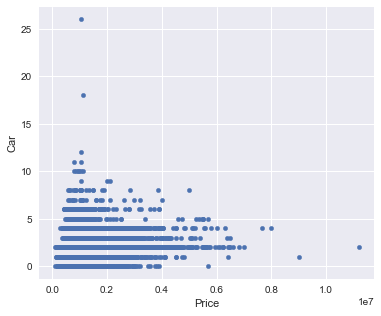

In [32]:
data.plot(y='Car',x='Price',kind='scatter',figsize=(6,5))

The correlation between Price and Car is relatively low

# Check for which suburb what is its mean price?

In [33]:
data.Suburb.value_counts().head(10).unique

<bound method Series.unique of Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Kew               467
Brighton          456
Brunswick         444
South Yarra       435
Hawthorn          428
Name: Suburb, dtype: int64>

Reservoir has the most houses than other suburbs

In [34]:
def formatting_columns(x):
    x[0] = '{0:.2f}'.format(x[0])
    x[1] = '{0:.0f}'.format(x[1])
    x[2] = '{0:.0f}'.format(x[2])
    x[3] = '{0:.0f}'.format(x[3])
    return x

In [36]:
data['Price'].groupby(data.Suburb).agg(['mean','count','max','min']).sort_values(by='mean',ascending=False).apply(formatting_columns,axis=1).head(20)

,mean,count,max,min
Suburb,,,,
Canterbury,1879138.66,137,8000000,615000
Middle Park,1858105.38,79,6400000,400000
Brighton,1699504.35,456,11200000,290000
Albert Park,1673115.07,131,4735000,420000
Deepdene,1655744.73,11,3680000,710000
Balwyn,1642501.36,319,5650000,390000
Malvern,1601608.07,222,6600000,338000
Camberwell,1588784.22,422,6000000,410000
Ivanhoe East,1579870.09,57,3850000,405000


Price of housing in Canterbury in mean() is highest which is 1879138.66	

--------------------------------------------------------------------

<a id=cau1.5> </a>
# 1,5. Linear Regression model

# Linear regression between Price and Others

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
LR = LinearRegression()

In [49]:
data.describe(include=['O']).T #To select all numeric types use numpy numpy.number. To select categorical objects use type object

,count,unique,top,freq
Suburb,34854,350,Reservoir,844
Address,34854,34006,5 Charles St,6
Type,34854,3,h,23978
Method,34854,9,S,19743
SellerG,34854,388,Jellis,3358
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


In [46]:
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)

In [47]:
from datetime import date
dataframe_dr = data.dropna().sort_values("Date")
all_Data = []
##Find out days since start
days_since_start = [(x - dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]
dataframe_dr["Days"] = days_since_start
suburb_dummies = pd.get_dummies(dataframe_dr[["Type", "Method"]])
all_Data = dataframe_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)
X = all_Data
y = dataframe_dr["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

-110097122.77


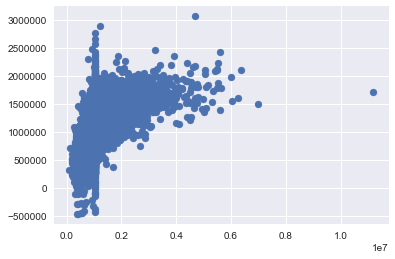

In [51]:
LR.fit(X_train,y_train)
print(LR.intercept_)
predictions = LR.predict(X_test)
plt.scatter(y_test, predictions)


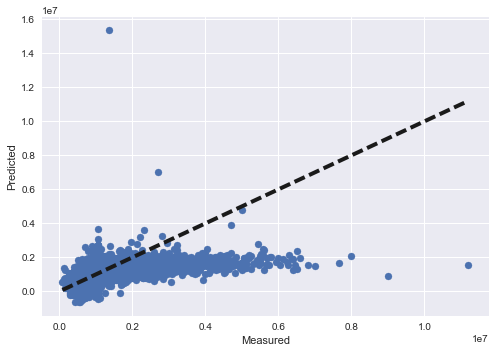

In [115]:
y = data.Price
X = data[['Rooms','Distance','Bedroom2','Car','Bathroom','Lattitude','Longtitude','Postcode','Landsize','BuildingArea']]
predicted = cross_val_predict(LR, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Linear regression between Bedroom2 and Rooms

In [55]:
# prepare the train and test data.
Col_Rooms_Bedrooms2 = data.loc[:,('Rooms','Bedroom2')]
train, test = train_test_split(Col_Rooms_Bedrooms2, test_size=0.2, random_state=42) #test_size = 20% in data
x_train = pd.DataFrame(train.Rooms)
y_train = train.Bedroom2
x_test = pd.DataFrame(test.Rooms)
y_test = test.Bedroom2

<strong> My note: </strong> Way to choose random_state https://stats.stackexchange.com/questions/298295/choosing-a-value-for-random-state-argument-in-scikit-learn-linear-regression

In [58]:
# Train the model
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# print result
c = LR.coef_[0]
i = LR.intercept_
print("For x is {} and y is {}".format('Rooms', 'Bedroom2'))
print('=> Formula:','y = {}x + {}'.format(c, i) if i>=0 else 'y={}x - {}'.formar(c,i))

For x is Rooms and y is Bedroom2
=> Formula: y = 0.7279413061179009x + 0.8558718861063372


------------------------------------------

<a id=cau2> </a>
# 2. Apply the model for prediction with holdout and cross validation

# 2.1 Holdout

In [60]:
from sklearn.metrics import mean_squared_error

## Use Root Mean-Square error  -  root-mean-square deviation (RMSD) or root-mean-square error (RMSE)

(lấy căn của sai số bình phương trung bình)
là sự khác biệt giữa các ước lượng và những gì được đánh giá

<img src="https://i.stack.imgur.com/eG03B.png", width=300, height = 250>

In [63]:
# predict the Bedrooms from Rooms in test sample and get Mean Squared Error.
y_predict = LR.predict(x_test)
print("Mean squared error is: %.4f"%mean_squared_error(y_test, y_predict))

Mean squared error is: 0.3051


In [93]:
y_Datapredict = LR.predict(data.Bedroom2.values.reshape(data.shape[0],1))
x_Datapredict = LR.predict(data.Rooms.values.reshape(data.shape[0],1))
print("Mean squared error is: %.4f"%mean_squared_error(x_Datapredict, y_Datapredict))

Mean squared error is: 0.1626


In [86]:
Col_Rooms_Bedrooms2.Rooms= Col_Rooms_Bedrooms2.Rooms.astype(dtype='int64')
Col_Rooms_Bedrooms2.Bedroom2= Col_Rooms_Bedrooms2.Bedroom2.astype(dtype='int64')

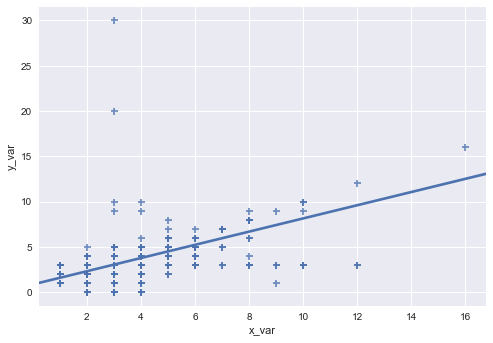

In [91]:
x, y = pd.Series(Col_Rooms_Bedrooms2.Rooms, name="x_var"), pd.Series(Col_Rooms_Bedrooms2.Bedroom2, name="y_var")
ax = sns.regplot(x=x, y=y, marker="+")

# 2.2 Show Cross-Validation

In [96]:
from sklearn.model_selection import cross_val_predict

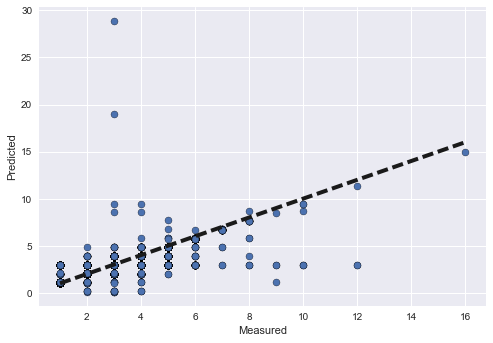

In [112]:
y = Col_Rooms_Bedrooms2.Rooms.values.reshape(data.shape[0],1)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(LR, Col_Rooms_Bedrooms2.Bedroom2.values.reshape(data.shape[0],1), y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

---------------------------------------------------

<a id=cau3> </a>
# 3. Using PCA, apply the model with holdout and cross validation

### Hold Out

In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) #Number of components to keep
X = data[['Rooms','Distance','Bedroom2','Car','Bathroom','Lattitude','Longtitude','Postcode','Landsize','BuildingArea']]
X_new = pd.DataFrame(pca.fit_transform(X.values))
y = data.Price.values

In [143]:
Y_new= pd.concat([pd.DataFrame([i], columns=['Price']) for i in y], ignore_index=True)

In [144]:
dataPCA = pd.concat([X_new,Y_new],axis=1)#  If int, random_state is the seed used by the random number generator;
train, test = train_test_split(dataPCA, test_size = 0.2, random_state=512)

In [145]:
train.shape

(27883, 6)

In [146]:
test.shape

(6971, 6)

In [149]:
name_col=[]
X_train = train[[0,1,2,3,4]]
y_train = train['Price']

X_test =  test[[0,1,2,3,4]]
y_test = test['Price']

In [153]:
lm.fit(X_train.values, y_train.values)
predict_train = lm.predict(X_train.values)
mean_squared_error(y_train, predict_train)

232556640535.07922

In [154]:
predict_test = lm.predict(X_test.values)
mean_squared_error(y_test, predict_test)

224617540483.66898

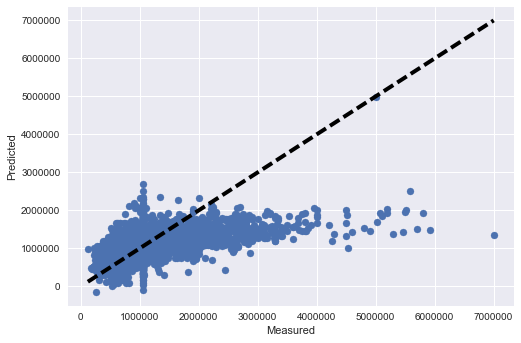

In [155]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Cross Validation

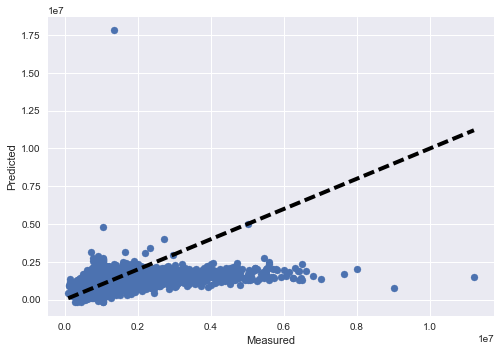

In [158]:
y = dataPCA.Price
X = dataPCA.loc[:, dataPCA.columns != 'Price']
predicted = cross_val_predict(lm, X.values, y.values, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<a id=cau4> </a>
# 4. Visualize the residue and homoscedasticity

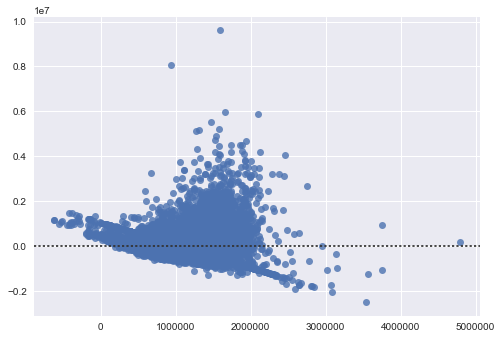

In [161]:
X = data[['Rooms','Distance','Bedroom2','Car','Bathroom','Lattitude','Longtitude','Postcode','Landsize','BuildingArea']]
y = data.Price
model.fit(X.values, y.values)
predict = model.predict(X.values)
sns.residplot(predict, y.values)

<a id=cau5> </a>
# 5. Tune the model if necessary

<a id=cau6> </a>
# 6. Write up analysis for each section (For example: explain why the model is overfitting, explain why applying PCA is better, etc.

<a id=cau7> </a>
# 7. Include conclusions for summary